In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow
import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from scipy import stats
import json

2023-04-28 00:42:32.439634: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import cactas as C

In [4]:
asymp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_no_norm.npy')
symp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_no_norm.npy')
asymp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_labels_no_norm.npy')
symp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_labels_no_norm.npy')

In [5]:
labels = np.concatenate((asymp_label, symp_label))
images = np.concatenate((asymp_img, symp_img))

In [6]:
labels.shape

(1417, 28, 28, 1)

In [7]:
images.shape

(1417, 28, 28, 1)

In [8]:
with open("symp_data.json", "r") as fp:
    symp_data = json.load(fp)
with open("asymp_data.json", "r") as fp:
    asymp_data = json.load(fp)

In [9]:
diffs = []
prev_val = None
for key in sorted(symp_data.keys(), key=int):
    val = symp_data[key]
    if prev_val is not None:
        diff = val - prev_val
        diffs.append(diff)
    prev_val = val

print(diffs)

[4, 8, 15, 18, 22, 14, 8, 18, 6, 5, 19, 20, 11, 8, 24, 3, 17, 13, 12, 26, 10, 4, 2, 5, 11, 5, 3, 2, 2, 31, 25, 10, 17, 3, 5, 6, 7, 9, 4, 4, 4, 15, 6, 9, 7, 10, 16, 17, 7, 6, 5, 20, 19, 30, 4, 65, 6, 7]


In [10]:
symp_list = [711]
result = 711
for i in diffs:
    result += i
    symp_list.append(result)

In [11]:
values = list(asymp_data.values()) + symp_list

In [16]:
values

[0,
 10,
 42,
 53,
 66,
 89,
 98,
 119,
 161,
 188,
 212,
 245,
 256,
 259,
 281,
 294,
 300,
 326,
 352,
 359,
 360,
 363,
 367,
 372,
 384,
 386,
 397,
 410,
 435,
 477,
 478,
 486,
 491,
 501,
 511,
 516,
 523,
 538,
 553,
 561,
 569,
 581,
 592,
 595,
 598,
 600,
 607,
 612,
 623,
 632,
 693,
 697,
 710,
 711,
 715,
 723,
 738,
 756,
 778,
 792,
 800,
 818,
 824,
 829,
 848,
 868,
 879,
 887,
 911,
 914,
 931,
 944,
 956,
 982,
 992,
 996,
 998,
 1003,
 1014,
 1019,
 1022,
 1024,
 1026,
 1057,
 1082,
 1092,
 1109,
 1112,
 1117,
 1123,
 1130,
 1139,
 1143,
 1147,
 1151,
 1166,
 1172,
 1181,
 1188,
 1198,
 1214,
 1231,
 1238,
 1244,
 1249,
 1269,
 1288,
 1318,
 1322,
 1387,
 1393,
 1400]

In [17]:
len(values)

112

In [25]:
values[::-1].index(1214)


11

In [28]:
items = list(symp_data.items())  # convert the dictionary to a list of key-value pairs
key = items[-11][0]      # access the key at the 11th index from the end
print(key)  

83


In [ ]:
index = values[::-1].index(nearest_bigger_value)    
items = list(symp_data.items())  
key = items[-index][0] 

In [8]:
def split(images, labels, val_size=0.15):
    with open("symp_data.json", "r") as fp:
        symp_data = json.load(fp)
    with open("asymp_data.json", "r") as fp:
        asymp_data = json.load(fp)
        
    diffs = []
    prev_val = None
    for key in sorted(symp_data.keys(), key=int):
        val = symp_data[key]
        if prev_val is not None:
            diff = val - prev_val
            diffs.append(diff)
        prev_val = val


    symp_list = [711]
    result = 711
    for i in diffs:
        result += i
        symp_list.append(result)
        
    values = list(asymp_data.values()) + symp_list
        
    length = images.shape[0]
    num = round(length * (1 - val_size))

    nearest_bigger_value = None
    for value in values:
        if value > num:
            if nearest_bigger_value is None or value < nearest_bigger_value:
                nearest_bigger_value = value

    index = values.index(nearest_bigger_value) 

    X_train = images[0:values[index]] 
    y_train = labels[0:values[index]]
    X_val = images[values[index]:]
    y_val = labels[values[index]:]
    
    return X_train, X_val, y_train, y_val

In [9]:
#X, y = shuffle(images, labels, random_state=0)
#X_train, X_val, y_train, y_val = split(X, y, val_size=0.15)

In [10]:
X_train.shape

(1214, 28, 28, 1)

In [11]:
y_train.shape

(1214, 28, 28, 1)

In [12]:
X_val.shape

(203, 28, 28, 1)

In [13]:
y_val.shape

(203, 28, 28, 1)

In [12]:
train_f1 = []
test_f1 = []
for i in range(10):
    X, y = shuffle(images, labels, random_state=0)
    X_train, X_val, y_train, y_val = split(X, y, val_size=0.15)
    rf = RandomForestClassifier(n_estimators=100)
    
    X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])
    y_train_raveled = y_train.reshape(y_train.shape[0], y_train.shape[1]*y_train.shape[2])
    y_val_raveled = y_val.reshape(y_val.shape[0], y_val.shape[1]*y_val.shape[2])


    fitted = rf.fit(X_train_raveled, y_train_raveled)
    
    y_pred = rf.predict(X_val_raveled)
    
    
    f1 = sklearn.metrics.f1_score(y_val_raveled, y_pred, average='macro')
    train_f1.append(f1)
    print('run', i, 'acc', sklearn.metrics.accuracy_score(y_val_raveled, y_pred), 'f1', f1)
    
    asymp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped.npy')
    symp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped.npy')
    asymp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_labels_cropped.npy')
    symp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_labels_cropped.npy')

    labels_test = np.concatenate((asymp_label_test, symp_label_test))
    images_test = np.concatenate((asymp_img_test, symp_img_test))
    
    X_test, y_test = shuffle(images_test, labels_test, random_state=0)
    
    X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
    y_test_raveled = y_test.reshape(y_test.shape[0], y_test.shape[1]*y_test.shape[2])
    
    y_pred = rf.predict(X_test_raveled)
    
    test_acc = sklearn.metrics.accuracy_score(y_test_raveled, y_pred)
    c_test_f1 = sklearn.metrics.f1_score(y_test_raveled, y_pred, average='macro')
    print('test run', i, 'acc', test_acc, 'f1', c_test_f1)
    
    test_f1.append(c_test_f1)


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 0 acc 0.009852216748768473 f1 0.1049247490742525
test run 0 acc 0.0014114326040931546 f1 0.12057295209793417


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 1 acc 0.009852216748768473 f1 0.10367785001158772
test run 1 acc 0.0014114326040931546 f1 0.1117132169914147


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 2 acc 0.0 f1 0.09960909094077437
test run 2 acc 0.0014114326040931546 f1 0.11933557513823785


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 3 acc 0.009852216748768473 f1 0.1008088594913108
test run 3 acc 0.0014114326040931546 f1 0.11992845996081726


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 4 acc 0.0 f1 0.1031949862143782
test run 4 acc 0.0014114326040931546 f1 0.12586153746539866


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 5 acc 0.0049261083743842365 f1 0.09983670241348042
test run 5 acc 0.0014114326040931546 f1 0.11481687075587241


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 6 acc 0.0049261083743842365 f1 0.09968715427546371
test run 6 acc 0.0014114326040931546 f1 0.10956156113567754


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 7 acc 0.0 f1 0.10485425331662075
test run 7 acc 0.0014114326040931546 f1 0.11807531362385641


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 8 acc 0.009852216748768473 f1 0.10120003130573342
test run 8 acc 0.0014114326040931546 f1 0.12668380957055622


/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


run 9 acc 0.0 f1 0.09566906945511348
test run 9 acc 0.0014114326040931546 f1 0.11869784812388223


In [13]:
def boxplot(all_data, labels, y_label='Time [s]', y_lim_min=0, y_lim=1000, title=None, outputdir='/home/jiehyun.kim001/CACTAS/_EXPERIMENTS/'):
    matplotlib.rcParams.update({'font.size': 32})
    plt.rc('axes', labelsize=65)    # fontsize of the x and y labels
    plt.rc('legend', fontsize=32)   
    plt.rc('xtick', labelsize=42) 

    # fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
    fig = plt.figure(figsize=(7, 13))
    ax = fig.gca()
    # ax1 = plt.gcf()
    boxprops = dict(color="black",linewidth=1.5)
    medianprops = dict(color="black",linewidth=1.5)
    # rectangular box plot
    bplot1 = plt.boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels,
                         boxprops=boxprops,
                         medianprops=medianprops)  # will be used to label x-ticks

    # fill with colors
    colors = ['#af8dc3', '#7fbf7b']
    # for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_ylabel(y_label)
    ax.set_ylim(y_lim_min,y_lim)

    titleb = title
    if not title:
        titleb = 'figure.pdf'



    filename_pdf = outputdir+'/'+titleb.replace(' ','_').replace(',','')+'.pdf'
    filename_png = outputdir+'/'+titleb.replace(' ','_').replace(',','')+'.png'
    plt.savefig(filename_pdf,bbox_inches='tight')
    plt.savefig(filename_png,bbox_inches='tight')

    if title:
        plt.title(title)


    plt.show()



    print(labels[0], np.mean(all_data[0]),'+/-', np.std(all_data[0]))
    print(labels[1], np.mean(all_data[1]),'+/-', np.std(all_data[1]))

    ttest = stats.ttest_ind(all_data[0],all_data[1])

    print('t_'+str(len(all_data[0]+all_data[1])), '=', str(round(ttest[0],3)), ',p=',str(round(ttest[1],2)))

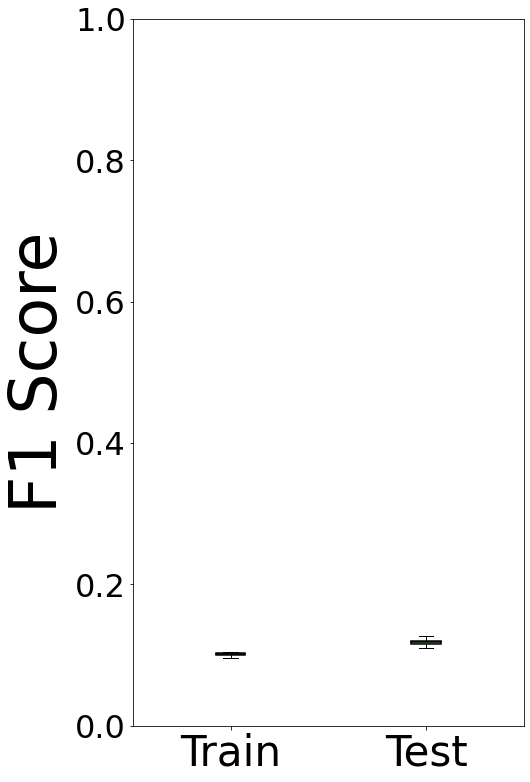

Train 0.10134627464987153 +/- 0.0027304858291698373
Test 0.11852471448636474 +/- 0.005176270233661181
t_20 = -8.806 ,p= 0.0


In [14]:
data = [train_f1, test_f1]
labels = ['Train', 'Test']
boxplot(data, labels, y_lim=1, y_label='F1 Score', outputdir='/home/jiehyun.kim001/CACTAS/_EXPERIMENTS/')